In [1]:
# Below is the script to assess accuracy of our HLA process for Dataset 1 samples
# only run this code block once - it is setup

%matplotlib inline
import tarfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

caller_list = list()
twodig_list = list()
fourdig_list = list()

Mounted at /content/gdrive


In [2]:
dir_1 =  "/content/gdrive/MyDrive/test/datasets/1_gs.csv"
dir_2 =  "/content/gdrive/MyDrive/test/MASTER RESULTS DIRECTORY/HLA-VBseq_d1_V2.csv"
caller_name = input('What is name of caller')

gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)

# Put in dictionary with key pointing to 6 values
index_list = list()


gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

print(index_list)


What is name of callerHLA-VBSEQ
[44, 49, 40, 36, 24, 35, 48, 1, 20, 18, 30, 0, 9, 32, 26, 47, 37, 16, 3, 31, 8, 17, 29, 41, 19, 45, 43, 11, 14, 21, 13, 27, 33, 7, 15, 46, 28, 23, 22, 6, 42, 39, 4, 12, 25, 38, 2, 10, 34, 5]


In [3]:
from sys import ps2
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:7])


  for k in range(0,len(g)):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])

print(gold_set)
print(pred_set)


['A*03:01', 'A*02:01', 'B*07:02', 'B*57:01', 'C*07:02', 'C*06:02', 'A*02:01', 'A*32:01', 'B*40:02', 'B*08:01', 'C*02:02', 'C*07:01', 'A*02:01', 'A*68:01', 'B*44:02', 'B*40:01', 'C*03:04', 'C*07:04', 'A*68:xx', 'A*02:01', 'B*07:02', 'B*15:01', 'C*07:02', 'C*03:03', 'A*03:01', 'A*03:01', 'B*35:03', 'B*35:01', 'C*04:01', 'C*04:01', 'A*26:01', 'A*30:02', 'B*44:02', 'B*18:01', 'C*05:01', 'C*05:01', 'A*24:02', 'A*01:01', 'B*39:06', 'B*08:01', 'C*07:02', 'C*07:01', 'A*25:01', 'A*03:01', 'B*08:01', 'B*18:01', 'C*07:01', 'C*12:03', 'A*24:02', 'A*01:01', 'B*40:01', 'B*08:01', 'C*03:04', 'C*07:01', 'A*02:01', 'A*02:01', 'B*44:02', 'B*15:01', 'C*05:01', 'C*03:04', 'A*02:01', 'A*02:01', 'B*14:02', 'B*14:01', 'C*08:02', 'C*08:02', 'A*01:01', 'A*03:01', 'B*08:01', 'B*07:02', 'C*07:01', 'C*07:02', 'A*32:01', 'A*02:01', 'B*40:02', 'B*27:05', 'C*02:02', 'C*07:04', 'A*02:01', 'A*02:01', 'B*27:05', 'B*57:01', 'C*02:02', 'C*06:02', 'A*26:01', 'A*03:01', 'B*07:02', 'B*07:02', 'C*07:02', 'C*07:02', 'A*02:01'

In [4]:
# 4 digit resolution
hit = 0
for i in range(0,len(gold_set)):
  try:
    if gold_set[i] == pred_set[i]:
      hit +=1 
    elif pred_set[i] == gold_set[i-1]:
      hit += 1
    elif pred_set[i] == gold_set[i+1]:
      hit += 1
  except:
    pass
# print
print('Accuracy is :' , hit*100/len(pred_set), ' %')

four_dig = hit*100/len(pred_set)

Accuracy is : 42.0  %


In [5]:
# 2 digit resolution
hit = 0
for i in range(0,len(gold_set)):
  if gold_set[i][0:4] == pred_set[i][0:4]:
    hit +=1 
  elif pred_set[i][0:4] == gold_set[i-1][0:4]:
    hit += 1
  elif pred_set[i][0:4] == gold_set[i+1][0:4]:
    hit += 1
# print
print('Accuracy is :' , hit*100/len(gold_set), ' %')

two_dig = hit*100/len(pred_set)

Accuracy is : 48.666666666666664  %


In [ ]:
caller_list.append(caller_name)
twodig_list.append(two_dig)
fourdig_list.append(four_dig)

print(caller_list)
print(twodig_list)
print(fourdig_list)

['seq2hla', 'HLA-VBseq', 'Optitype', 'RNA2HLA', 'phlat', 'arcas']
[97.66666666666667, 48.666666666666664, 97.33333333333333, 59.0, 96.66666666666667, 97.66666666666667]
[92.33333333333333, 42.0, 94.66666666666667, 54.333333333333336, 83.66666666666667, 68.33333333333333]


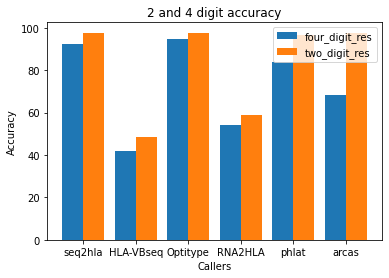

In [ ]:
#graph creation. only run once once all data is collected
X_axis = np.arange(len(caller_list))
plt.bar(X_axis - 0.2, fourdig_list, 0.4, label = 'four_digit_res')
plt.bar(X_axis + 0.2, twodig_list, 0.4, label = 'two_digit_res')
plt.xticks(X_axis, caller_list)
plt.xlabel('Callers')
plt.ylabel('Accuracy')
plt.title('2 and 4 digit accuracy')
plt.legend()

In [ ]:
################# BELOW: OLD SCRIPTS: DO NOT EXECUTE! #####################


# inversion adjustment OLD SCRIPT

hit = 0
for i in range(0,len(gold_set),2):

  if gold_set[i] == pred_set[i] and gold_set[i+1] == pred_set[i+1]:
    hit += 2
  elif gold_set[i+1] == pred_set[i] and gold_set[i] == pred_set[i+1]:
    hit += 2

# print
print('Accuracy is :' , hit*100/len(gold_set), ' %')

Accuracy is : 75.33333333333333  %


In [ ]:
# For dataset 2
%matplotlib inline
import tarfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dir_1 =  "/content/D2_GS.csv"
dir_2 =  "/content/optitype_d2t.csv"
# Assessmnet
ref = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
# Put in array
reference = ref.values
prediction = pre.values

# Aligning reference & prediction
predic = []
for i in range(0,len(reference)):
  n = reference[i][0]
  if n in prediction:
    id = np.where(prediction == n)[0][0]
    predic.append(prediction[id])
  else:
    predic.append(['x', 'x', 'x', 'x', 'x', 'x',
       'x'])
# Put in Array
gold_set = []
pred_set = []
for i in range(0,len(reference)):
  r = reference[i][1:7]
  for k in range(0,len(r)):
    gold_set.append(r[k])

for i in range(0,len(predic)):
  p = predic[i][1:]
  for k in range(0,len(r)):
    pred_set.append(p[k])

# Show sample data
print('gold_standard')
print(gold_set[:15])
print('Predicted')
print(pred_set[:15])

# Find accuracy 
hit = 0
idx = []
for k in range(0,len(pred_set)):
  w = pred_set[k][2:]
  if w in gold_set[k]:
    hit +=1 
    idx.append(k)
print()
print()
print('Accuracy is :' , hit*100/len(pred_set), ' %')

gold_standard
['01:01/01:04/01:22/01:32/01:34/01:37', '24:02/24:09/24:11/24:40/24:76/24:79/24:83', '41:02:00', '57:01:00', '6:02', '17:01/17:02/17:03', '02:01/02:09/02:43/02:66/02:75/02:83/02:89/02:97/02:13/02:14', '30:01/30:24', '13:02', '56:01/56:24', '01:02/01:25', '6:02', '03:01/03:20/03:21/03:26/03:37/03:45', '31:01/31:14/31:23', '44:02/44:19/44:27/44:66']
Predicted
['A*24:02', 'A*01:01', 'B*57:01', 'B*41:02', 'C*06:02', 'C*17:01', 'A*30:01', 'A*02:01', 'B*56:01', 'B*13:02', 'C*01:02', 'C*06:02', 'A*31:01', 'A*03:01', 'B*51:01']


Accuracy is : 35.54421768707483  %


In [ ]:
# adjusting for inversion
hit = 0
for k in range(0,len(pred_set)):
  w = pred_set[k][2:]
  if w in gold_set[k]:
      hit +=1

  if w in gold_set[k-1]:
      hit += 1
  if k + 1 < len(pred_set):
    if w in gold_set[k+1]:
        hit += 1
# print
print('Accuracy is :' , hit*100/len(gold_set), ' %')

Accuracy is : 78.87755102040816  %
